In [54]:
import pandas as pd
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
%pip install chardet

Note: you may need to restart the kernel to use updated packages.


# Mercats i fires al carrer de la ciutat de Barcelona

In [4]:
import chardet 
with open('mercats-centrescomercials_mercats-fires-al-carrer.csv', 'rb') as file:     
    raw_data = file.read()     
    result = chardet.detect(raw_data)     
    encoding = result['encoding']     
    confidence = result['confidence']  
encoding

'UTF-16'

In [8]:
df = pd.read_csv('mercats-centrescomercials_mercats-fires-al-carrer.csv', encoding="UTF-16")

In [9]:
df.sample

<bound method NDFrame.sample of      register_id                                               name  \
0   ﻿98096114839                         Fira d'Artesans Nou Barris   
1   ﻿96092130232                  Mostra d'Art *Pl Sant Josep Oriol   
2   ﻿96093124226  Mostra de Pintors Afeccionats *Pl Sagrada Família   
3   ﻿96092125659               Mercat Gòtic Antiguitats *Plaça Nova   
4   ﻿96092131636  Fira del Col·lectiu d'Artesans d'Alimentació *...   
5   ﻿96093122603                      Mostra d'Art *Plaça de Sarrià   
6   ﻿96058200711              'Mercadillo' de la Marina-Zona Franca   
7   ﻿96058201233     Mercat de Numismàtica i Filatèlia *Plaça Reial   
8   ﻿99400213409        Fira d'Embotits Artesanals *Plaça de Sarrià   
9   ﻿95191112500                  Mercat de Pins *Pg Lluís Companys   
10  ﻿98187143140                         Petit Mercat de Provençals   
11  ﻿97094130710               Fira de Llibre Vell *Plaça de Sarrià   
12  ﻿99400164981                    Fira d'Ar

In [10]:
df.head()

,register_id,name,institution_id,institution_name,created,modified,addresses_roadtype_id,addresses_roadtype_name,addresses_road_id,addresses_road_name,...,values_description,secondary_filters_id,secondary_filters_name,secondary_filters_fullpath,secondary_filters_tree,secondary_filters_asia_id,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y
0,﻿98096114839,Fira d'Artesans Nou Barris,NaN,NaN,1998-04-06T00:00:00+02:00,2022-09-17T05:39:12.290224+02:00,NaN,NaN,351901,Pg Valldaura,...,NaN,58731069,Mercats i fires al carrer,Planol BCN >> Mercats i centres comercials >> ...,651,65103005000001,430680.775576,4.587786e+06,41.438653,2.170246
1,﻿96092130232,Mostra d'Art *Pl Sant Josep Oriol,NaN,NaN,1996-04-01T00:00:00+02:00,2022-04-20T12:17:11.359363+02:00,NaN,NaN,305008,Plaça de Sant Josep Oriol,...,NaN,58731069,Mercats i fires al carrer,Planol BCN >> Mercats i centres comercials >> ...,651,65103005000001,430933.892399,4.581553e+06,41.382535,2.173987
2,﻿96093124226,Mostra de Pintors Afeccionats *Pl Sagrada Família,NaN,NaN,1996-04-02T00:00:00+02:00,2022-11-08T10:56:50.314199+01:00,NaN,NaN,292201,Pl Sagrada Família,...,NaN,58731069,Mercats i fires al carrer,Planol BCN >> Mercats i centres comercials >> ...,651,65103005000001,430857.562697,4.583712e+06,41.401974,2.172827
3,﻿96092125659,Mercat Gòtic Antiguitats *Plaça Nova,NaN,NaN,1996-04-01T00:00:00+02:00,2023-05-10T15:31:43.649232+02:00,NaN,NaN,230907,Plaça Nova,...,NaN,58731069,Mercats i fires al carrer,Planol BCN >> Mercats i centres comercials >> ...,651,65103005000001,431049.101250,4.581693e+06,41.383808,2.175348
4,﻿96092131636,Fira del Col·lectiu d'Artesans d'Alimentació *...,NaN,NaN,1996-04-01T00:00:00+02:00,2022-11-07T13:59:41.613567+01:00,NaN,NaN,256106,Pl Pi,...,NaN,58731069,Mercats i fires al carrer,Planol BCN >> Mercats i centres comercials >> ...,651,65103005000001,430899.354739,4.581530e+06,41.382327,2.173576


In [11]:
df_mercats = df

In [12]:
df_mercats.head()

,register_id,name,institution_id,institution_name,created,modified,addresses_roadtype_id,addresses_roadtype_name,addresses_road_id,addresses_road_name,...,values_description,secondary_filters_id,secondary_filters_name,secondary_filters_fullpath,secondary_filters_tree,secondary_filters_asia_id,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y
0,﻿98096114839,Fira d'Artesans Nou Barris,NaN,NaN,1998-04-06T00:00:00+02:00,2022-09-17T05:39:12.290224+02:00,NaN,NaN,351901,Pg Valldaura,...,NaN,58731069,Mercats i fires al carrer,Planol BCN >> Mercats i centres comercials >> ...,651,65103005000001,430680.775576,4.587786e+06,41.438653,2.170246
1,﻿96092130232,Mostra d'Art *Pl Sant Josep Oriol,NaN,NaN,1996-04-01T00:00:00+02:00,2022-04-20T12:17:11.359363+02:00,NaN,NaN,305008,Plaça de Sant Josep Oriol,...,NaN,58731069,Mercats i fires al carrer,Planol BCN >> Mercats i centres comercials >> ...,651,65103005000001,430933.892399,4.581553e+06,41.382535,2.173987
2,﻿96093124226,Mostra de Pintors Afeccionats *Pl Sagrada Família,NaN,NaN,1996-04-02T00:00:00+02:00,2022-11-08T10:56:50.314199+01:00,NaN,NaN,292201,Pl Sagrada Família,...,NaN,58731069,Mercats i fires al carrer,Planol BCN >> Mercats i centres comercials >> ...,651,65103005000001,430857.562697,4.583712e+06,41.401974,2.172827
3,﻿96092125659,Mercat Gòtic Antiguitats *Plaça Nova,NaN,NaN,1996-04-01T00:00:00+02:00,2023-05-10T15:31:43.649232+02:00,NaN,NaN,230907,Plaça Nova,...,NaN,58731069,Mercats i fires al carrer,Planol BCN >> Mercats i centres comercials >> ...,651,65103005000001,431049.101250,4.581693e+06,41.383808,2.175348
4,﻿96092131636,Fira del Col·lectiu d'Artesans d'Alimentació *...,NaN,NaN,1996-04-01T00:00:00+02:00,2022-11-07T13:59:41.613567+01:00,NaN,NaN,256106,Pl Pi,...,NaN,58731069,Mercats i fires al carrer,Planol BCN >> Mercats i centres comercials >> ...,651,65103005000001,430899.354739,4.581530e+06,41.382327,2.173576


In [14]:
df_mercats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   register_id                    46 non-null     object 
 1   name                           46 non-null     object 
 2   institution_id                 0 non-null      float64
 3   institution_name               0 non-null      float64
 4   created                        46 non-null     object 
 5   modified                       46 non-null     object 
 6   addresses_roadtype_id          0 non-null      float64
 7   addresses_roadtype_name        0 non-null      float64
 8   addresses_road_id              46 non-null     int64  
 9   addresses_road_name            46 non-null     object 
 10  addresses_start_street_number  46 non-null     int64  
 11  addresses_end_street_number    3 non-null      float64
 12  addresses_neighborhood_id      46 non-null     int64

In [47]:
columns = ['name', 'addresses_road_name', 'addresses_neighborhood_name', 'addresses_district_name', 'addresses_zip_code', 'geo_epgs_4326_x', 'geo_epgs_4326_y']                          
df_mercats_a = df_mercats[columns]

In [48]:
df_mercats_a.head()

,name,addresses_road_name,addresses_neighborhood_name,addresses_district_name,addresses_zip_code,geo_epgs_4326_x,geo_epgs_4326_y
0,Fira d'Artesans Nou Barris,Pg Valldaura,la Guineueta,Nou Barris,8042,41.438653,2.170246
1,Mostra d'Art *Pl Sant Josep Oriol,Plaça de Sant Josep Oriol,el Barri Gòtic,Ciutat Vella,8002,41.382535,2.173987
2,Mostra de Pintors Afeccionats *Pl Sagrada Família,Pl Sagrada Família,la Sagrada Família,Eixample,8013,41.401974,2.172827
3,Mercat Gòtic Antiguitats *Plaça Nova,Plaça Nova,el Barri Gòtic,Ciutat Vella,8002,41.383808,2.175348
4,Fira del Col·lectiu d'Artesans d'Alimentació *...,Pl Pi,el Barri Gòtic,Ciutat Vella,8002,41.382327,2.173576


In [49]:
df_mercats_a.isnull().sum()

name                           0
addresses_road_name            0
addresses_neighborhood_name    0
addresses_district_name        0
addresses_zip_code             0
geo_epgs_4326_x                0
geo_epgs_4326_y                0
dtype: int64

In [25]:
df_mercats_a.isnull()

,name,addresses_road_name,addresses_neighborhood_name,addresses_district_name,addresses_zip_code,secondary_filters_name,geo_epgs_4326_x,geo_epgs_4326_y
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [26]:
df_mercats_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         46 non-null     object 
 1   addresses_road_name          46 non-null     object 
 2   addresses_neighborhood_name  46 non-null     object 
 3   addresses_district_name      46 non-null     object 
 4   addresses_zip_code           46 non-null     int64  
 5   secondary_filters_name       46 non-null     object 
 6   geo_epgs_4326_x              46 non-null     float64
 7   geo_epgs_4326_y              46 non-null     float64
dtypes: float64(2), int64(1), object(5)
memory usage: 3.0+ KB


In [27]:
df_json = df_mercats_a.to_json(orient='records')

In [28]:
print(df_json)

[{"name":"Fira d'Artesans Nou Barris","addresses_road_name":"Pg Valldaura","addresses_neighborhood_name":"la Guineueta","addresses_district_name":"Nou Barris","addresses_zip_code":8042,"secondary_filters_name":"Mercats i fires al carrer","geo_epgs_4326_x":41.438652556,"geo_epgs_4326_y":2.1702455769},{"name":"Mostra d'Art *Pl Sant Josep Oriol","addresses_road_name":"Pla\u00e7a de Sant Josep Oriol","addresses_neighborhood_name":"el Barri G\u00f2tic","addresses_district_name":"Ciutat Vella","addresses_zip_code":8002,"secondary_filters_name":"Mercats i fires al carrer","geo_epgs_4326_x":41.3825348351,"geo_epgs_4326_y":2.1739865534},{"name":"Mostra de Pintors Afeccionats *Pl Sagrada Fam\u00edlia","addresses_road_name":"Pl Sagrada Fam\u00edlia","addresses_neighborhood_name":"la Sagrada Fam\u00edlia","addresses_district_name":"Eixample","addresses_zip_code":8013,"secondary_filters_name":"Mercats i fires al carrer","geo_epgs_4326_x":41.4019739323,"geo_epgs_4326_y":2.1728272814},{"name":"Mercat

In [41]:
carpeta = "json"
nombre_archivo = "mercats_i_fires.json"
ruta_archivo = os.path.join(carpeta, nombre_archivo)

In [42]:
os.makedirs(carpeta, exist_ok=True)

In [46]:
with open(ruta_archivo, 'w') as archivo:
    json.dump(df_json, archivo)

In [51]:
df_json = df_mercats_a.to_json(orient='records', force_ascii=False).encode('utf-8')



# Guardar los datos JSON en el archivo con codificación UTF-8
with open(ruta_archivo, 'w', encoding='utf-8') as archivo:
    archivo.write(df_json.decode('utf-8'))

In [52]:
df_mercats_a.head()

,name,addresses_road_name,addresses_neighborhood_name,addresses_district_name,addresses_zip_code,geo_epgs_4326_x,geo_epgs_4326_y
0,Fira d'Artesans Nou Barris,Pg Valldaura,la Guineueta,Nou Barris,8042,41.438653,2.170246
1,Mostra d'Art *Pl Sant Josep Oriol,Plaça de Sant Josep Oriol,el Barri Gòtic,Ciutat Vella,8002,41.382535,2.173987
2,Mostra de Pintors Afeccionats *Pl Sagrada Família,Pl Sagrada Família,la Sagrada Família,Eixample,8013,41.401974,2.172827
3,Mercat Gòtic Antiguitats *Plaça Nova,Plaça Nova,el Barri Gòtic,Ciutat Vella,8002,41.383808,2.175348
4,Fira del Col·lectiu d'Artesans d'Alimentació *...,Pl Pi,el Barri Gòtic,Ciutat Vella,8002,41.382327,2.173576


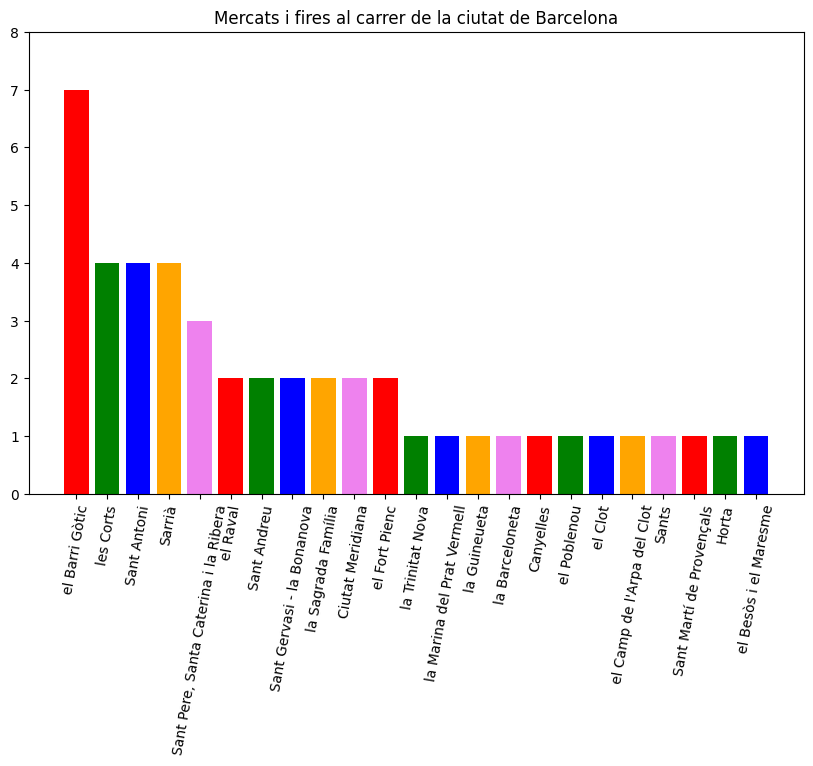

In [58]:
x = df_mercats_a.value_counts('addresses_neighborhood_name').index
y = df_mercats_a.value_counts('addresses_neighborhood_name')

fig = plt.figure(figsize=(10, 6))
colores = ['red', 'green', 'blue', 'orange', 'violet']

plt.bar(x, y,
        width=0.8,
        color = colores)

plt.xticks(rotation=80)  # Rota los nombres del eje x en 90 grados


plt.title('Mercats i fires al carrer de la ciutat de Barcelona')
plt.ylim(0, 8)
plt.show()

In [59]:
duplicados = df_mercats_a.duplicated().sum()
print(duplicados)

4
